In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
info = pd.read_csv(r'C:\Users\maxar\OneDrive\Documents\Portfolio Projects Data\Houses Prices\London_House_Prices.csv')

In [3]:
info

,Address,Square Footage,Bedrooms,Bathrooms,Has Garden,Has Garage,Has Pool,Has Gym,Has Elevator,Has Fireplace,Is Waterfront,Has Central Air,Is Renovated,Has View,Price
0,"Regent Street, 124",2109,4,2,0,0,1,0,1,0,0,1,0,1,211150
1,"Oxford Street, 38",1474,4,2,1,1,1,1,0,0,0,0,1,0,147650
2,"Regent Street, 145",1626,3,1,1,1,1,0,1,1,0,0,0,0,162775
3,"Bond Street, 176",2445,1,2,1,0,1,1,1,1,0,1,1,1,244600
4,"Regent Street, 74",3303,4,1,1,0,1,0,0,0,1,0,0,1,330525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Camden Market, 22",1866,3,2,0,1,0,0,1,1,0,1,0,1,186800
96,"Regent Street, 83",1466,4,2,0,0,1,0,0,0,1,1,0,0,146850
97,"Bond Street, 25",3297,2,1,1,0,1,0,1,1,0,1,0,0,329825
98,"Camden Market, 173",1187,3,2,1,0,0,0,0,1,0,1,0,0,118900


In [4]:
prices = info['Price']
prices.describe()

count       100.000000
mean     215647.500000
std       73841.699411
min      100225.000000
25%      152237.500000
50%      204725.000000
75%      280550.000000
max      348350.000000
Name: Price, dtype: float64

In [5]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Address          100 non-null    object
 1   Square Footage   100 non-null    int64 
 2   Bedrooms         100 non-null    int64 
 3   Bathrooms        100 non-null    int64 
 4   Has Garden       100 non-null    int64 
 5   Has Garage       100 non-null    int64 
 6   Has Pool         100 non-null    int64 
 7   Has Gym          100 non-null    int64 
 8   Has Elevator     100 non-null    int64 
 9   Has Fireplace    100 non-null    int64 
 10  Is Waterfront    100 non-null    int64 
 11  Has Central Air  100 non-null    int64 
 12  Is Renovated     100 non-null    int64 
 13  Has View         100 non-null    int64 
 14  Price            100 non-null    int64 
dtypes: int64(14), object(1)
memory usage: 11.8+ KB


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
info.shape

(100, 15)

In [8]:
info.isnull().sum()

Address            0
Square Footage     0
Bedrooms           0
Bathrooms          0
Has Garden         0
Has Garage         0
Has Pool           0
Has Gym            0
Has Elevator       0
Has Fireplace      0
Is Waterfront      0
Has Central Air    0
Is Renovated       0
Has View           0
Price              0
dtype: int64

In [9]:
without_address = info.drop(columns=['Address'])

In [10]:
correlation = without_address.corr()

In [11]:
import seaborn as sns

<Axes: >

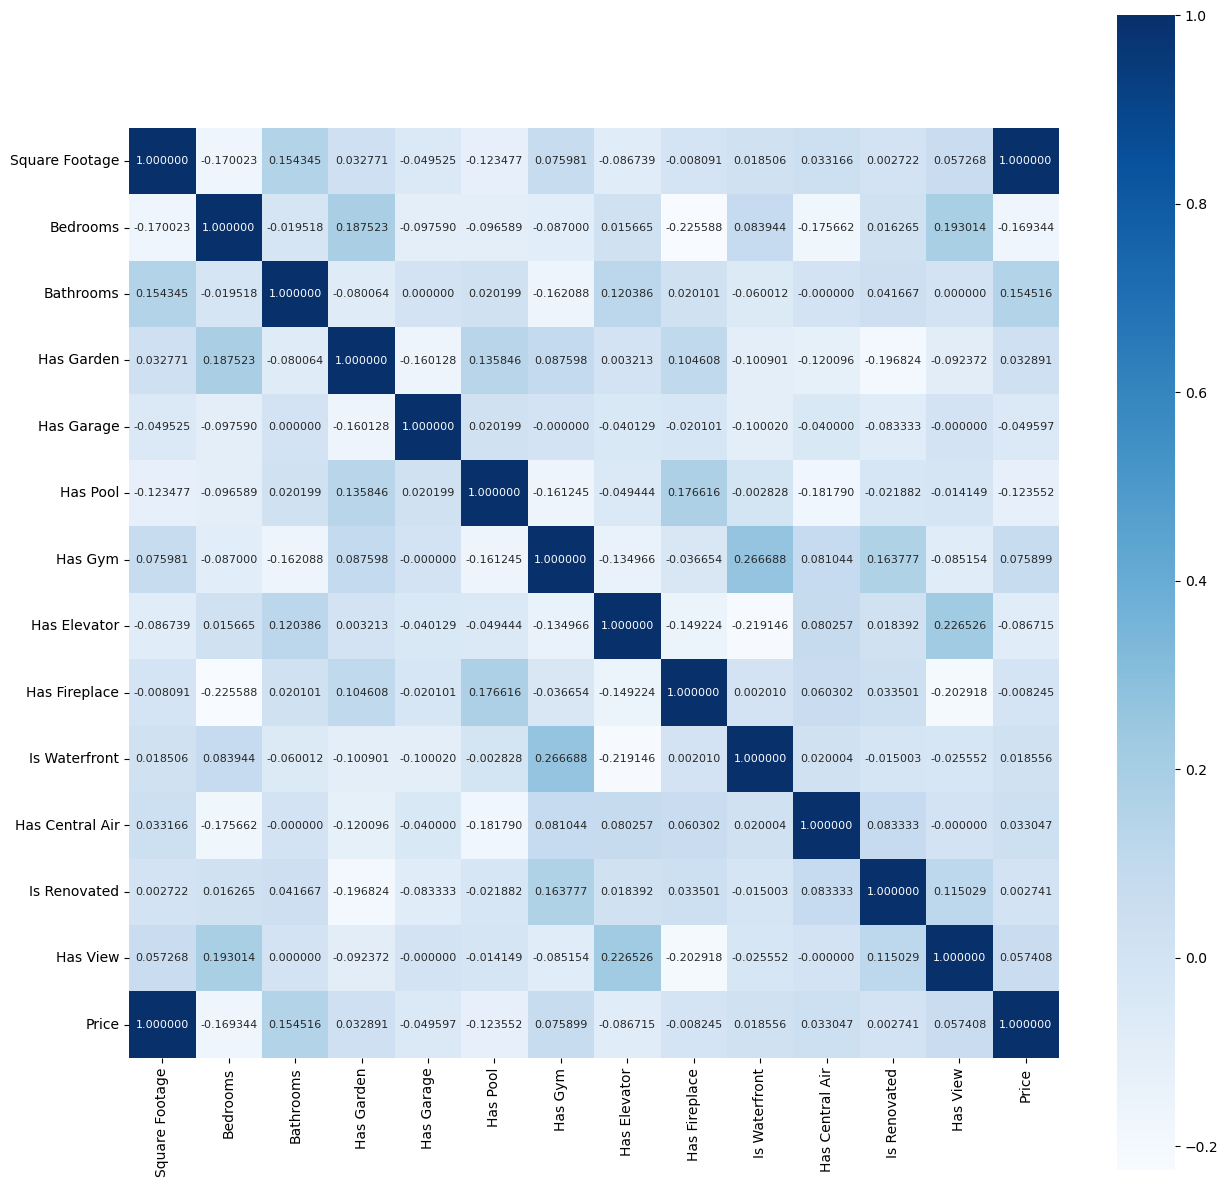

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cbar=True, square=True, fmt='1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [35]:
X = info.drop(columns=['Price'])
Y = pd.DataFrame(info['Price'])

In [36]:
print(X,Y)

               Address  Square Footage  Bedrooms  Bathrooms  Has Garden  \
0   Regent Street, 124            2109         4          2           0   
1    Oxford Street, 38            1474         4          2           1   
2   Regent Street, 145            1626         3          1           1   
3     Bond Street, 176            2445         1          2           1   
4    Regent Street, 74            3303         4          1           1   
..                 ...             ...       ...        ...         ...   
95   Camden Market, 22            1866         3          2           0   
96   Regent Street, 83            1466         4          2           0   
97     Bond Street, 25            3297         2          1           1   
98  Camden Market, 173            1187         3          2           1   
99    Covent Garden, 4            1453         3          1           0   

    Has Garage  Has Pool  Has Gym  Has Elevator  Has Fireplace  Is Waterfront  \
0            0    

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(100, 14) (80, 14) (20, 14)


In [39]:
from sklearn import metrics
from xgboost import XGBRegressor

In [40]:
model = XGBRegressor()

In [46]:
X_train1 = X_train.drop(columns=['Address'])

In [48]:
model.fit(X_train1, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:
training_data_prediction = model.predict(X_train1)

In [51]:
print(training_data_prediction)

[270599.94  196724.98  238425.02  192949.97  292900.06  282274.97
 340750.03  283649.97  257899.98  270550.06  272475.    147650.02
 176650.05  169074.97  174924.97  241325.02  135250.    282500.
 328750.    205424.92  240700.05  266799.94  109349.984 209549.97
 186800.02  295749.97  208325.    193725.02  188749.92  126374.99
 168500.02  146850.03  325950.03  329500.03  130325.055 139700.02
 133024.97  174549.97  329825.03  120825.01  348349.97  147399.98
 207550.05  118899.99  344975.    224725.02  106624.984 334624.97
 122524.99  114424.99  312250.03  260499.97  126874.99  133500.02
 245900.03  125625.01  243925.    323749.94  320850.03  199774.98
 330524.97  316875.03  107225.    242799.95  192825.06  159174.97
 119899.98  100225.02  325875.1   269550.    279975.    167400.02
 149049.98  104849.984 201425.02  164275.08  220424.98  285124.94
 153300.02  311674.94 ]


In [53]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print('R Squared Error', score_1)
print('Mean Absolute Error', score_2)

R Squared Error 1.0
Mean Absolute Error 0.02773437462747097


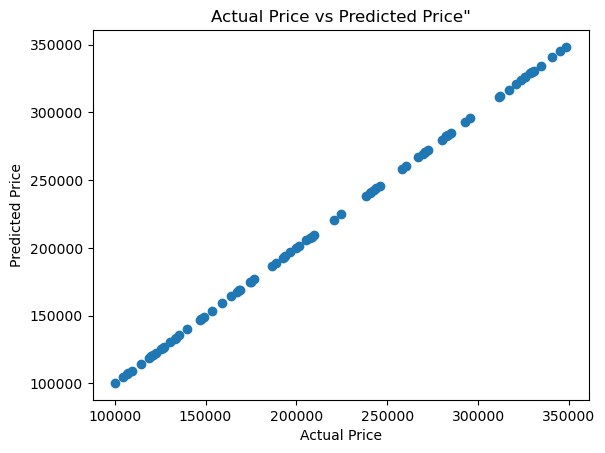

In [57]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price"')
plt.show()

In [60]:
X_test1 = X_test.drop(columns=['Address'])

In [61]:
test_data_prediction = model.predict(X_test1)

In [62]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print('R Sqaured Error:', score_1)
print('Mean Absolute Error:', score_2)

R Sqaured Error: 0.9966097474098206
Mean Absolute Error: 3145.10498046875
